## Sumário

[Funções de Ativação](#funcao-ativacao)

[Funções de Custo](#)

[Implementação e Comentários](#)

* [Problema 1](#)

* [Problema 2](#)

* [Problema 3](#)

* [Problema 4](#)

* [Problema 5](#)

* [Problema 6](#)

[Referências](#)

## Imports

In [279]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from utils import plots
import matplotlib.pyplot as plt
import statistics as st
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, explained_variance_score

%matplotlib inline

## Funções de Ativação

In [280]:
def sigmoid(x, derivative=False):
    if derivative:
        y = sigmoid(x)
        return y*(1 - y)
    return 1.0/(1.0 + np.exp(-x))

In [281]:
def tanh(x, derivative=False):
    if derivative:
        y = tanh(x)
        return 1 - y**2
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [282]:
def relu(x, derivative=False):
    if derivative:
        return np.where(x <= 0, 0, 1)
    return np.maximum(0, x)

In [283]:
def step(x,derivative=False):
    if derivative:
        return np.where(x>0,1,1)
    return np.where(x>0,1,0)

In [284]:
def linear(x, derivative=False):
    return np.ones_like(x) if derivative else x

## Funções auxiliares

In [285]:
def softmax(x, y_oh=None, derivative=False):
    if derivative: 
        y_pred = softmax(x)
        y_correct = np.argmax(y_oh, axis=1)
        pk = y_pred[range(y_pred.shape[0]), y_correct]
        y_pred[range(y_pred.shape[0]), y_correct] = pk*(1.0 - pk)
        return y_pred
    exp = np.exp(x)
    return exp/np.sum(exp, axis=1, keepdims=True)

In [286]:
def neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_correct = np.argmax(y_oh, axis=1)
    pk = y_pred[range(y_pred.shape[0]), y_correct]
    if derivative:
        y_pred[range(y_pred.shape[0]), y_correct] = (-1.0/pk)
        return y_pred
    return np.mean(-np.log(pk))

## Funções de custo

In [287]:
def mse(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred)
    return np.mean((y - y_pred)**2)

In [288]:
def sigmoid_cross_entropy(y, y_pred, derivative=False):
    if derivative:
        return -(y - y_pred)
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [289]:
def softmax_neg_log_likelihood(y_oh, y_pred, derivative=False):
    y_softmax = softmax(y_pred)
    y_correct = np.argmax(y_oh, axis=1)
    pk = y_softmax[range(y_softmax.shape[0]), y_correct]
    if derivative:
        return -(y_oh - y_softmax)/y_oh.shape[0]
    return np.mean(-np.log(pk))

## Implementação e Comentários

Resoluções das questões utilizando numpy e o framework keras

### Problema 1

A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma rede de Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. Para
solução do problema defina antes um conjunto de treinamento e um conjunto de validação.
Dica: O problema pode ser formulado como um problema de classificação de 8 padrões
diferentes, sendo que cada padrão representa um vértice do cubo.

In [290]:
x,y = np.loadtxt('data/1a1X.txt', delimiter=','), np.loadtxt('data/1a1Y.txt', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=2000, stratify=y, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3000, 3), (2000, 3), (3000, 8), (2000, 8))

### Numpy

In [291]:
w = np.random.random((8, 3))-0.5
b = np.zeros(8)

learning_rate = 0.02

for s in range(200):
    for x_i, y_i in zip(x_train,y_train):
        x_i =  x_i.reshape(1, x_train.shape[1])
        y_pred = np.dot(x_i, w.T) + b
        y_pred = step(y_pred)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        
    if s%50 == 0:
        print('step {0}: {1}'.format(s, error))
        
y_pred = step(np.dot(x_val, w.T)+b)
print('w: ', w)
print('b: ', b)
print('y_pred: ', y_pred)

accuracy_score(y_val, y_pred)

step 0: [[ 0.  0.  0.  0.  0.  0.  0.  0.]]
step 50: [[ 0.  0.  0.  0.  0.  0.  0.  0.]]
step 100: [[ 0.  0.  0.  0.  0.  0.  0.  0.]]
step 150: [[ 0.  0.  0.  0.  0.  0.  0.  0.]]
w:  [[-0.0179318  -0.22565804 -0.25176306]
 [-0.09246842 -0.02088084  0.13639082]
 [-0.02226157  0.03851695 -0.27779374]
 [-0.08467029  0.02860602  0.17021267]
 [ 0.02292101 -0.25455928 -0.11647358]
 [ 0.02550047 -0.08978332  0.21481713]
 [ 0.11359556  0.04521441 -0.11016248]
 [ 0.02720508  0.0682176   0.06505292]]
b:  [[  6.93889390e-18  -1.20000000e-01  -2.00000000e-02  -1.80000000e-01
   -2.00000000e-02  -2.20000000e-01  -1.40000000e-01  -1.40000000e-01]]
y_pred:  [[0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]


1.0

### Keras

In [292]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=x_train.shape[1]))
model.compile(loss='mse', optimizer='sgd')

model.fit(x_train, y_train, epochs=200, batch_size=x.shape[0], verbose=0)
y_pred = model.predict(x, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('error: ', error)
print('w:', w.T)
print('b:', b)
print('y_pred:', y_pred)

error:  0.14452303946
w: [[ 0.22805789 -0.69285429 -0.01116829]
 [ 0.25031877  0.05426127  0.23466925]
 [ 0.57940382 -0.5382905  -0.03932582]
 [-0.26185107  0.32213011  0.25837108]
 [ 0.5701465   0.04245177 -0.03186811]
 [-0.52993888  0.04265136 -0.02391422]
 [ 0.32843569  0.07780313  0.33991146]
 [ 0.20825432 -0.68277383  0.64212912]]
b: [-0.00108351 -0.0755147  -0.07526918 -0.03069619 -0.08698256 -0.00415713
 -0.12014504 -0.04679461]
y_pred: [[ 0.          0.          0.         ...,  0.03849424  0.          0.        ]
 [ 0.          0.21341583  0.         ...,  0.01458002  0.29756957  0.        ]
 [ 0.2158061   0.40947333  0.46480882 ...,  0.          0.5482021
   0.80358887]
 ..., 
 [ 0.          0.15376206  0.         ...,  0.          0.21230493
   0.59365845]
 [ 0.22697438  0.17480406  0.50413465 ...,  0.          0.20829065
   0.16145971]
 [ 0.          0.15915455  0.         ...,  0.          0.21976642
   0.59533453]]


### Problema 2

Implemente uma rede perceptron de múltiplas camadas treinando-a com os seguintes
algoritmos:

- Algoritmo da retropropagação em modo estocástico usando a regra delta;

- Algoritmo da retropropagação em modo por lote usando a regra delta;

- Algoritmo da retropropagação usando a regra delta com termo do momento;


In [296]:
class Layer:
    def __init__(self, input_dim, output_dim, activation=step, use_bias=True):
        self.input = None
        self.weights = np.random.randn(output_dim, input_dim)
        self.bias = np.random.randn(1, output_dim)
        self.activation = activation
        self._activ_inp, self._activ_out = None, None
        self.input_dim = input_dim
        self.use_bias = use_bias
        self._dweights, self._dbias, self._prev_dweights = None, None, 0.0

In [384]:
class NeuralNetwork:
    def __init__(self, cost_func=mse, learning_rate=1e-3, momentum=0.0):
        self._layers = []
        self.cost_func = cost_func
        self._learning_rate = learning_rate
        self.momentum = momentum
        self.epoch_error_train = []
    
    def __backpropagation(self, y,y_pred):
        last_delta = self.cost_func(y, y_pred, derivative=True)
        for layer in reversed(self._layers):
            dactivation = layer.activation(layer._activ_inp, derivative=True)*last_delta
            last_delta = np.dot(dactivation, layer.weights)
            layer.dweights = np.dot(dactivation.T, layer.input)
            layer.dbias = 1.0*dactivation.sum(axis=0, keepdims=True)
        
        for layer in reversed(self._layers):
            layer._prev_dweights = -self._learning_rate*layer.dweights + self.momentum*layer._prev_dweights
            layer.weights = layer.weights + layer._prev_dweights
            layer.biases = layer.bias - self._learning_rate*layer.dbias
    
    def __forward(self, x):
        self._layers[0].input = x
        for current_layer, next_layer in zip(self._layers, self._layers[1:] + [Layer(0,0)]):
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.bias
            current_layer._activ_inp = y
            current_layer._activ_out = next_layer.input = current_layer.activation(y)
        return self._layers[-1]._activ_out

    def add(self, layer):
        self._layers.append(layer)
    
    def evaluate(self,y_pred, y, dtype=int):
        score = 0
        total = 100.0/y.shape[0]
        y_pred = y_pred.astype(dtype)
        y = y.astype(dtype)

        for y_i, y_pred_i in zip(y,y_pred):
            if np.array_equal(y_i,y_pred_i):
                score+=1
        return score*total

    def fit(self, X=None, Y=None, epochs=1, by_batch=False, verbose=0):
        for step in range(epochs+1):
            if by_batch:
                y_pred = self.__forward(X)
                self.__backpropagation(Y, y_pred)
            else:
                for x_i, y_i in zip(X, Y):
                    x_i = x_i.reshape(1, X.shape[1])
                    y_pred = self.__forward(x_i)
                    self.__backpropagation(y_i, y_pred)
            #--
            yx = Y if by_batch else y_i
            self.epoch_error_train.append([np.abs(yx-y_pred)[0], step])
    
            if step % verbose == 0:
                data_loss = self.cost_func(y, self.predict(X))
                print('loss: ', data_loss)
                
    def get_learning_rate(self):
        return self._learning_rate

    def get_weights(self):
        return self._layers[-1].weights, self._layers[-1].bias

    def predict(self, X, verbose=False):
        return self.__forward(X)

### Problema 3

Usando algoritmos implementados na questão 2, aproxime as funções abaixo. Compare os
resultados com as curvas exatas, para o caso dos itens b e c e apresente para cada caso a
curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação. Faça uma análise comparativa sobre a convergência de cada um
dos algoritmos

### Função lógica XOR

In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)

In [ ]:
D_in, D_out = x.shape[1], y.shape[1]
model = NeuralNetwork(cost_func=mse, learning_rate=1e-1)
model.add(Layer(input_dim=D_in, output_dim=2, activation=sigmoid))
model.add(Layer(input_dim=2, output_dim=D_out, activation=step))

### Estocástico

In [ ]:
model.fit(x, y, epochs=500, verbose=100, by_batch=False)
y_pred = model.predict(x)
print('y_pred:', y_pred)
accurancy = model.evaluate(y, y_pred)

accuracy_score(y.reshape(-1, 1), y_pred)

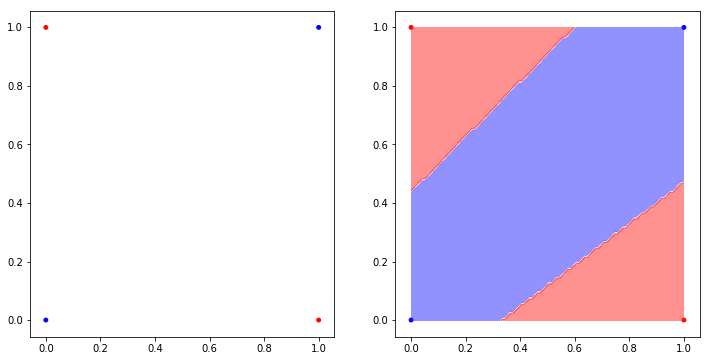

In [144]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### Batch

In [159]:
model.fit(x, y, epochs=500, by_batch=True, verbose=100)
y_pred = model.predict(x)
print('y_pred:', y_pred)
accurancy = model.evaluate(y, y_pred)

accuracy_score(y.reshape(-1, 1), y_pred)

loss:  0.0
loss:  0.0
loss:  0.0
loss:  0.0
loss:  0.0
loss:  0.0
y_pred: [[0]
 [1]
 [1]
 [0]]


1.0

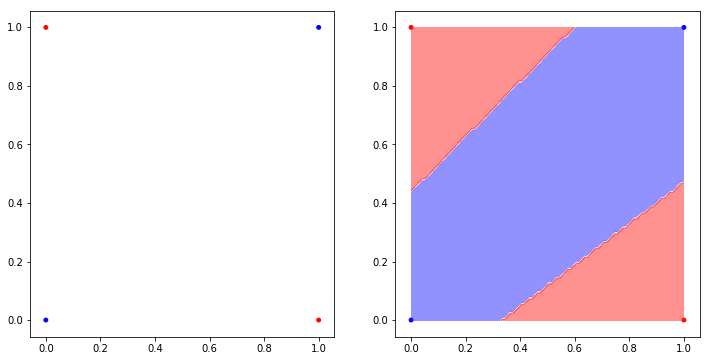

In [160]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

### sen(xπ)/xπ  ,  0 ≤ x ≤ 4

In [385]:
x,y = np.loadtxt('data/1a3bX.txt'), np.loadtxt('data/1a3bY.txt')
x_train, x_val, y_train, y_val = train_test_split(x.reshape(-1,1), y.reshape(-1,1), test_size=2000, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3000, 1), (2000, 1), (3000, 1), (2000, 1))

In [397]:
D_in, D_out = x_train.shape[1], y_train.shape[1]
model = NeuralNetwork(learning_rate=0.01)
model.add(Layer(input_dim=D_in, output_dim=10, activation=tanh))
model.add(Layer(input_dim=10, output_dim=10, activation=tanh))
model.add(Layer(input_dim=10, output_dim=D_out, activation=linear))

### Estocástico

In [369]:
model.fit(x_train, y_train, epochs=1000, by_batch=False, verbose=100)
y_pred = model.predict(x_val)
print('y_pred:', y_pred)

loss:  0.507966249796
loss:  0.50887310553
loss:  0.51028272468
loss:  0.510853229118
loss:  0.511081568224
loss:  0.511192573343
loss:  0.511254352419
loss:  0.511292300159
loss:  0.511318313687
loss:  0.511338545019
loss:  0.511356206351
y_pred: [[ 0.48177666]
 [-0.19512789]
 [-0.46980793]
 ..., 
 [ 0.00271046]
 [-0.8035895 ]
 [-0.24639668]]


0.999951957155


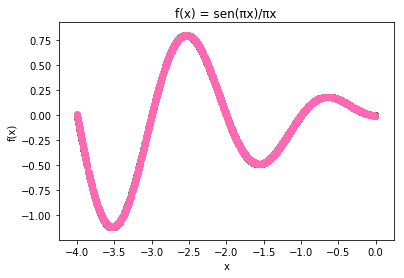

In [370]:
print(r2_score(y_val, y_pred=y_pred))
plt.title('f(x) = sen(πx)/πx')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.scatter(x_val, y_val, c='green')
plt.scatter(x_val, y_pred, c='hotpink')

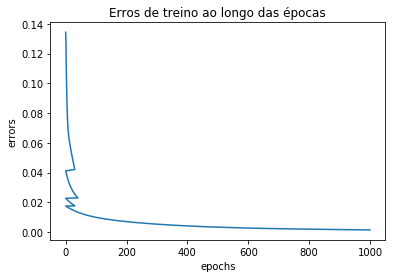

In [371]:
plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(np.array(model.epoch_error_train)[:,1],np.array(model.epoch_error_train)[:,0])

### Batch

In [398]:
model.fit(x_train, y_train, epochs=1000, by_batch=True, verbose=100)
y_pred = model.predict(x_val)
print('y_pred:', y_pred)

loss:  12951.6305926


/home/alvesmarcos/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/alvesmarcos/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


loss:  nan


KeyboardInterrupt: 

### Problema 4

Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão

In [227]:
x, y = np.loadtxt('data/1a4X.txt', delimiter=','), np.loadtxt('data/1a4Y.txt').reshape(-1,1)
x.shape, y.shape

((7883, 2), (7883, 1))

In [228]:
onehot = OneHotEncoder(sparse=False)
y_oh = onehot.fit_transform(y)
y_oh

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [231]:
D_in, D_out = x.shape[1], y_oh.shape[1]

model = NeuralNetwork(cost_func=softmax_neg_log_likelihood, learning_rate=1e-1, momentum=0.9)
model.add(Layer(input_dim=D_in, output_dim=20, activation=linear))
model.add(Layer(input_dim=20, output_dim=D_out, activation=linear))

model.fit(X=x, Y=y_oh, epochs=5000, by_batch=True, verbose=1000)
y_pred = model.predict(x).argmax(axis=1)

print('Matriz de de confusão:\n', confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

loss:  5.38727345088
loss:  25.6948100539
loss:  35.9691342238
loss:  43.827102711
loss:  50.4182712151
loss:  56.1924425014
Matriz de de confusão:
 [[1203    4    0    0    2    0    0    0]
 [   0 1296    0    1    0    7    0    0]
 [   2    0 1265    0    0    0    5    0]
 [   0    3    0 1211    0    0    0   11]
 [   0    0    0    0  712    0    0    0]
 [   0    4    0    0    0  743    0    0]
 [   0    0    0    0    0    0  729    0]
 [   0    0    0    0    0    0    0  685]]


0.99505264493213241

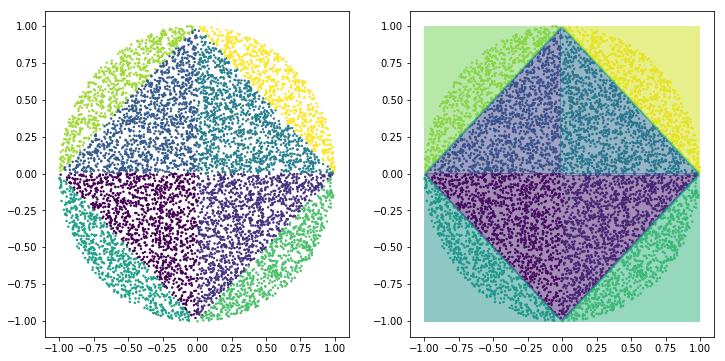

In [230]:
plots.plot_data_and_predictions_3d_in_2d(x, y, is_binary=False, nn=model, s=2)

### Problema 5

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal . Avalie o desempenho mostrando para cada caso os erros de predição. 
Dica: Para auxiliar na resolução desse problema você pode usar K entradas (por exemplo, K=10), que correspondem a K passos anteriores a n: x(n-1), x(n-2),..., x(n-K), e deve fazer a
predição dos valores x(n+1), x(n+2) e x(n+3)

In [207]:
x = np.linspace(-5, 5, 1000).reshape(-1, 1)
y = np.sin(x + np.sin(x)**2).reshape(-1, 1)

In [210]:
D_in, D_out = x.shape[1], y.shape[1]

model = NeuralNetwork(cost_func=mse, learning_rate=1e-4)
model.add(Layer(input_dim=D_in, output_dim=20, activation=tanh))
model.add(Layer(input_dim=20, output_dim=30, activation=tanh))
model.add(Layer(input_dim=30, output_dim=30, activation=tanh))
model.add(Layer(input_dim=30, output_dim=D_out, activation=linear))

model.fit(x, y, epochs=1000, verbose=0)
y_pred = model.predict(x)

KeyboardInterrupt: 

In [ ]:
plt.plot(x, y)
plt.plot(x, y_pred, c='green')